In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import the data
prior_df = pd.read_csv("../data/true_label__inst_type=sample__task=tissue.csv.gz", compression="gzip", sep=",")
ic_df = pd.read_csv("../data/UBERON_IC.csv", sep=",")
log2auprc_df = pd.read_csv("../data/tissue_model_stats.csv", sep=",")
best_th_df = pd.read_csv("../data/mcc_f1_best_threshold.csv", sep = "\t")
samplelasso_label = pd.read_csv("../data/sampleLASSO_labels_prior_pos_predpos.csv", sep=",")


In [ ]:
# best threshold
best_th_df = best_th_df[best_th_df["task"] != "task"].reset_index(drop = True)
best_th_df["best_thresold"] = pd.to_numeric(best_th_df["best_threshold"], errors="coerce")
best_th_df.head()

,task,best_threshold
0,UBERON:0012275,0.004847
1,UBERON:0000955,0.044477
2,UBERON:0002020,0.051052
3,UBERON:0000165,0.002126
4,CL:0000393,0.001462


In [114]:
best_th_df.shape

(359, 2)

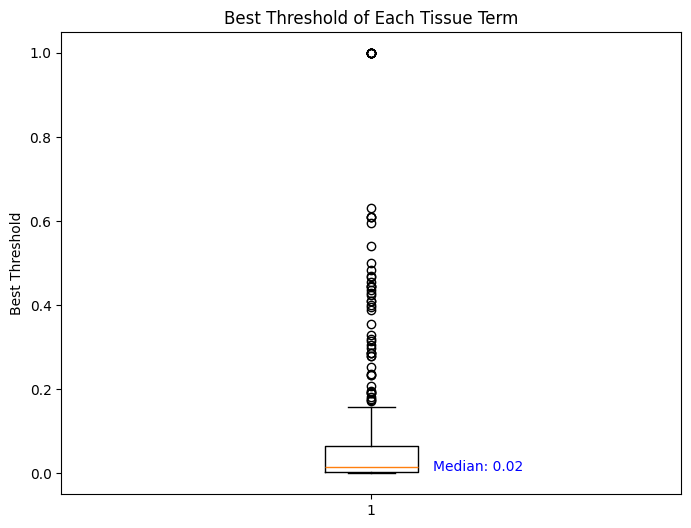

In [120]:
# boxplot for the best threshold
plt.figure(figsize=(8, 6))
box = plt.boxplot(best_th_df["best_threshold"])
median_value = best_th_df["best_threshold"].median()
plt.text(1.1, median_value, f"Median: {median_value:.2f}", verticalalignment='center', fontsize=10, color='blue')
plt.ylabel("Best Threshold")
plt.title("Best Threshold of Each Tissue Term")
# Show the plot
plt.show()


In [69]:
# the top terms having the highest threshold
th_top_10 = best_th_df.sort_values(by="best_threshold", ascending = False).head(10)
th_top_10

,task,best_threshold
110,UBERON:0001062,0.999139
43,UBERON:0000468,0.999139
67,UBERON:0003942,0.999139
198,UBERON:0000061,0.999139
205,UBERON:0010000,0.999139
139,UBERON:0000467,0.999139
51,UBERON:0034923,0.999139
8,UBERON:0001032,0.999139
91,UBERON:0004456,0.999139
89,UBERON:0000465,0.999139


### txt2onto models label

In [ ]:
# combine the best threshold, prior, ic, pos, logarprc
prior = []
ic = []
pos = []
auprcprior = []
for i in best_th_df["task"]:
    prior_df_sub = prior_df[["Unnamed: 0", i]]
    prior_df_sub = prior_df_sub[(prior_df_sub != 0).all(axis=1)]
    prior_df_sub[i] = prior_df_sub[i].replace(-1, 0)
    prior.append(prior_df_sub[i].mean())
    ic_value = ic_df.loc[ic_df['node'] == i, 'IC'].values[0]
    ic.append(ic_value)
    pos_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'num_of_pos'].values[0]
    pos.append(pos_value)
    auprc_value = log2auprc_df.loc[log2auprc_df['ID'] == i, 'log2(auprc/prior)'].values[0]
    auprcprior.append(auprc_value)

In [130]:
# data used to train txt2onto
txt2onto_label = pd.DataFrame({"task": best_th_df["task"], "best_threshold": best_th_df["best_threshold"], "prior": prior, "ic": ic, "num_of_pos": pos, "log2(auprc/prior)": auprcprior})
txt2onto_label

,task,best_threshold,prior,ic,num_of_pos,log2(auprc/prior)
0,UBERON:0012275,0.004847,0.004284,3.895248,117,4.192162
1,UBERON:0000955,0.044477,0.085881,2.067788,2394,3.632799
2,UBERON:0002020,0.051052,0.016515,2.488143,387,3.393686
3,UBERON:0000165,0.002126,0.008627,2.936865,286,3.000259
4,CL:0000393,0.001462,0.002127,4.094535,62,9.196561
...,...,...,...,...,...,...
354,UBERON:0004807,0.008825,0.005022,5.041716,168,5.159565
355,UBERON:0011300,0.285415,0.017519,3.333409,405,5.328570
356,UBERON:0000459,0.005924,0.004084,6.447813,112,7.718440
357,UBERON:0005178,0.423936,0.087684,3.382555,2369,3.363656


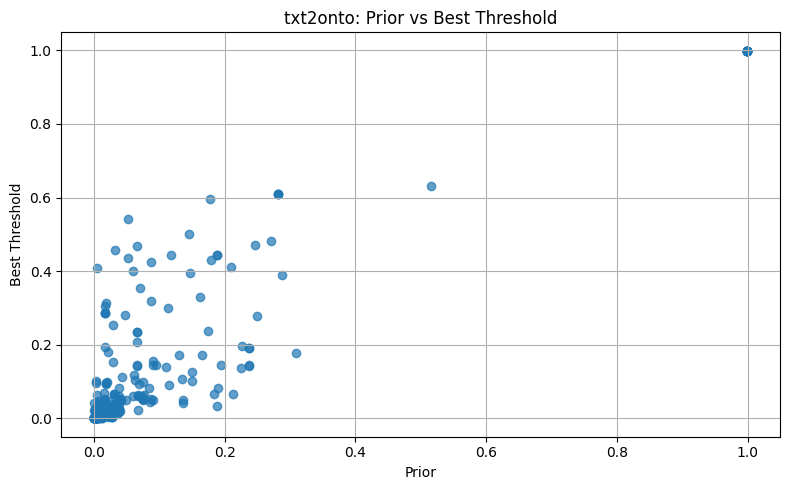

In [171]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label['prior'], txt2onto_label['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label['prior'], txt2onto_label['best_threshold'], 1)
#plt.plot(txt2onto_label['prior'], m * txt2onto_label['prior'] + b, color='blue', label='Regression line')

plt.xlabel('Prior')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Prior vs Best Threshold')
plt.grid(True)
plt.tight_layout()
plt.show()

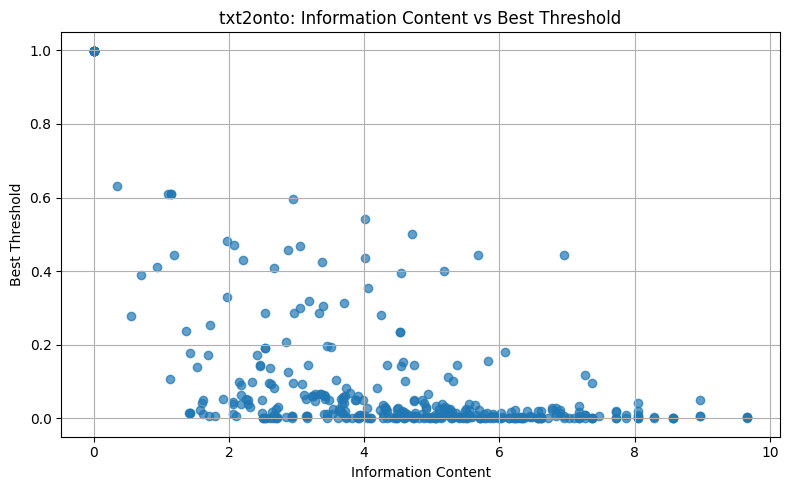

In [172]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label['ic'], txt2onto_label['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label['ic'], txt2onto_label['best_threshold'], 1)
#plt.plot(txt2onto_label['ic'], m * txt2onto_label['ic'] + b, color='blue', label='Regression line')

plt.xlabel('Information Content')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Information Content vs Best Threshold')
plt.grid(True)
plt.tight_layout()
plt.show()

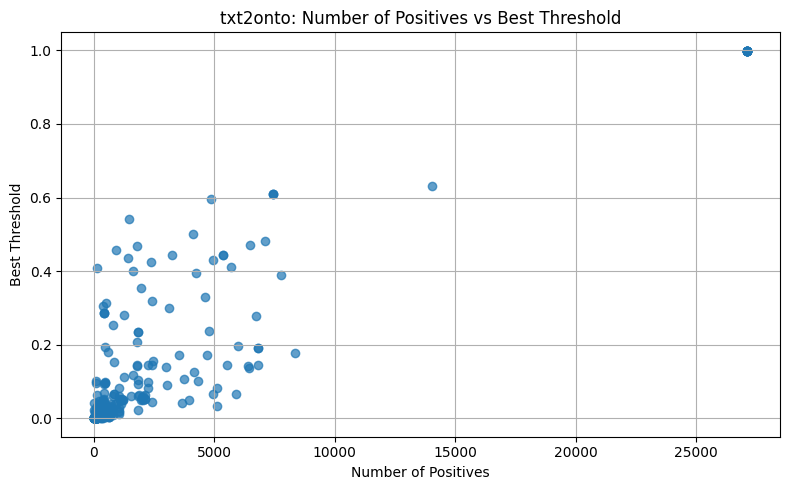

In [173]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label['num_of_pos'], txt2onto_label['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label['num_of_pos'], txt2onto_label['best_threshold'], 1)
#plt.plot(txt2onto_label['num_of_pos'], m * txt2onto_label['num_of_pos'] + b, color='blue', label='Regression line')

plt.xlabel('Number of Positives')
plt.ylabel('Best Threshold')
plt.title('txt2onto: Number of Positives vs Best Threshold')
plt.grid(True)
plt.tight_layout()
plt.show()

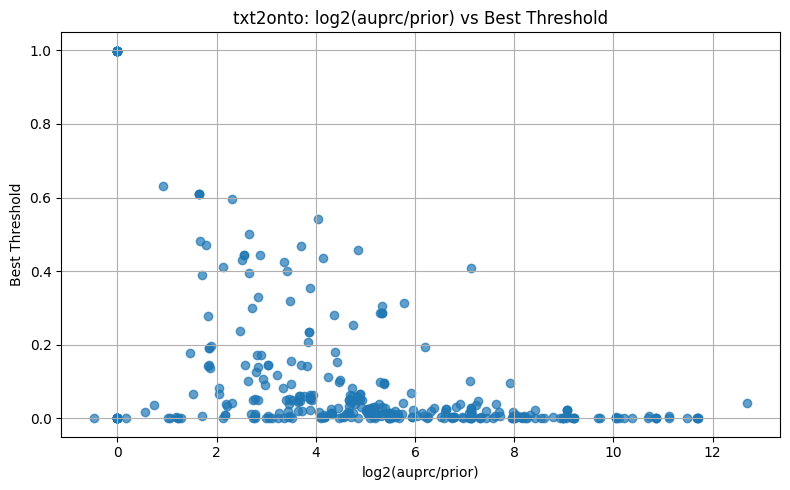

In [174]:
plt.figure(figsize=(8, 5))
plt.scatter(txt2onto_label['log2(auprc/prior)'], txt2onto_label['best_threshold'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(txt2onto_label['log2(auprc/prior)'], txt2onto_label['best_threshold'], 1)
#plt.plot(txt2onto_label['log2(auprc/prior)'], m * txt2onto_label['log2(auprc/prior)'] + b, color='blue', label='Regression line')

plt.xlabel('log2(auprc/prior)')
plt.ylabel('Best Threshold')
plt.title('txt2onto: log2(auprc/prior) vs Best Threshold')
plt.grid(True)
plt.tight_layout()
plt.show()

### sampleLASSO microarray ground truth label

In [ ]:
samplelasso_label.head()

,task,best_threshold,prior,num_of_pos,num_of_pred_pos
0,UBERON:0012275,0.004847,0.006904,51,120
1,UBERON:0000955,0.044477,0.057641,456,426
2,UBERON:0002020,0.051052,0.013676,107,58
3,UBERON:0000165,0.002126,0.018734,143,147
4,CL:0000393,0.001462,0.002462,18,73


In [ ]:
samplelasso_label.shape

(359, 5)

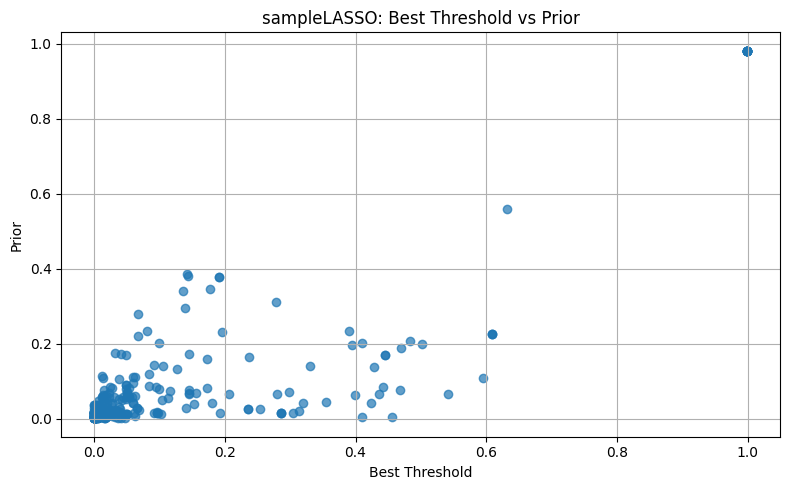

In [178]:
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label['best_threshold'], samplelasso_label['prior'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label['best_threshold'], samplelasso_label['prior'], 1)
#plt.plot(samplelasso_label['best_threshold'], m * samplelasso_label['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Prior')
plt.title('sampleLASSO: Best Threshold vs Prior')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
gt_prior_top_10 = samplelasso_label.sort_values(by="prior", ascending = False).head(10)
gt_prior_top_10

,task,best_threshold,prior,num_of_pos,num_of_pred_pos
91,UBERON:0004456,0.999139,0.981183,7978,6180
89,UBERON:0000465,0.999139,0.981183,7978,6180
51,UBERON:0034923,0.999139,0.981183,7978,6180
110,UBERON:0001062,0.999139,0.981183,7978,6180
205,UBERON:0010000,0.999139,0.981183,7978,6180
43,UBERON:0000468,0.999139,0.981183,7978,6180
67,UBERON:0003942,0.999139,0.981183,7978,6180
8,UBERON:0001032,0.999139,0.981183,7978,6180
194,UBERON:0015203,0.999139,0.981183,7978,6180
139,UBERON:0000467,0.999139,0.981183,7978,6180


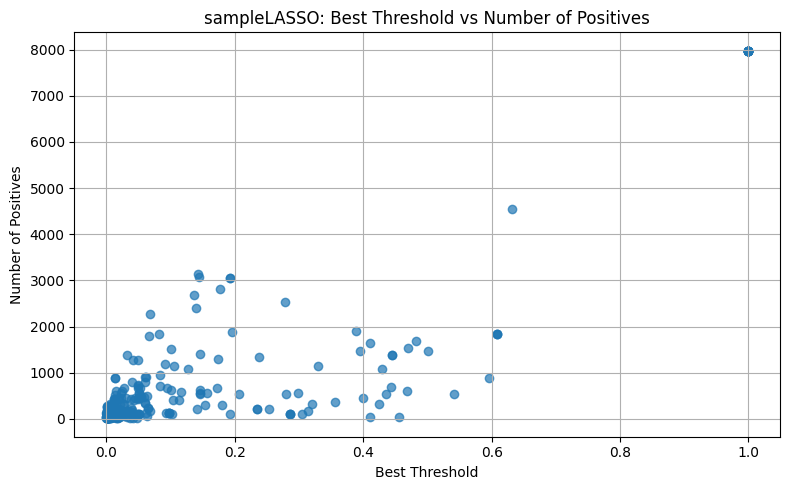

In [176]:
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label['best_threshold'], samplelasso_label['num_of_pos'], alpha=0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label['best_threshold'], samplelasso_label['num_of_pos'], 1)
#plt.plot(samplelasso_label['best_threshold'], m * samplelasso_label['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Positives')
plt.title('sampleLASSO: Best Threshold vs Number of Positives')
plt.grid(True)
plt.tight_layout()
plt.show()

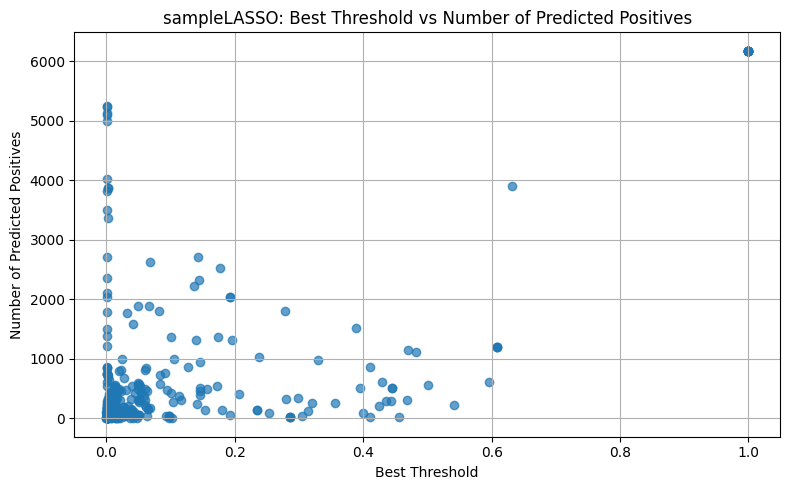

In [177]:
plt.figure(figsize=(8, 5))
plt.scatter(samplelasso_label['best_threshold'], samplelasso_label['num_of_pred_pos'], alpha = 0.7)

# Fit a linear regression line
#m, b = np.polyfit(samplelasso_label['best_threshold'], samplelasso_label['num_of_pred_pos'], 1)
#plt.plot(samplelasso_label['best_threshold'], m * samplelasso_label['best_threshold'] + b, color='blue', label='Regression line')

plt.xlabel('Best Threshold')
plt.ylabel('Number of Predicted Positives')
plt.title('sampleLASSO: Best Threshold vs Number of Predicted Positives')
plt.grid(True)
plt.tight_layout()
plt.show()